In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
ad = pd.read_csv("advertising.csv")
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [44]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

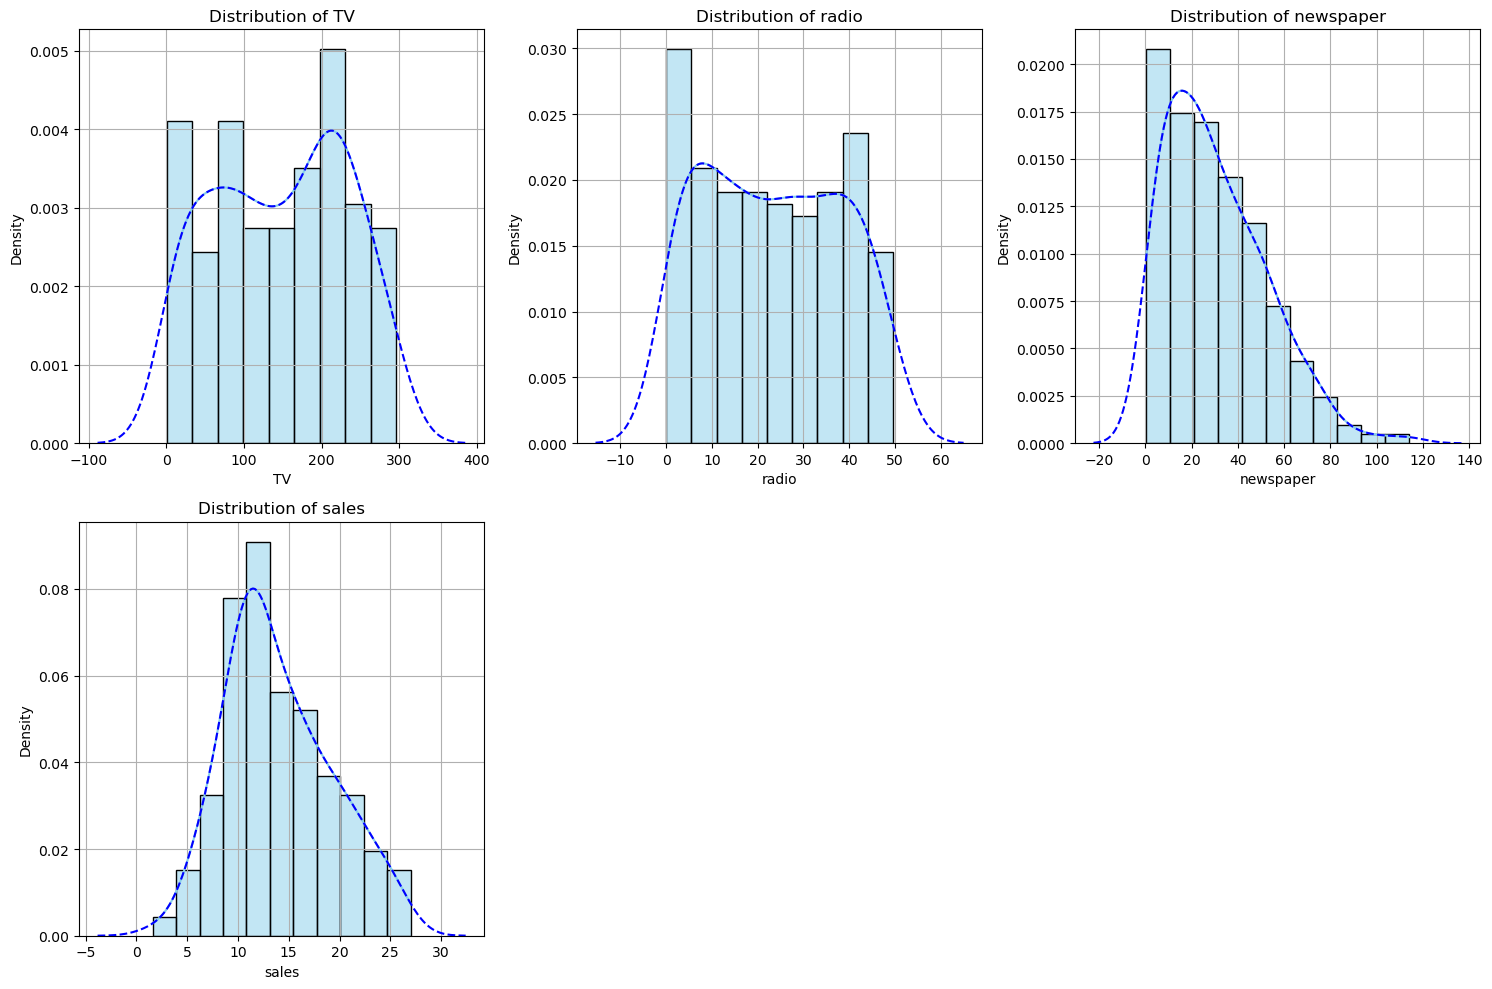

In [45]:
# Distribution of variables
columns = df.columns.tolist()
num_plots = len(columns)
num_cols = 3
num_rows = num_plots // num_cols + 1

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue', stat='density')
    sns.kdeplot(df[column], color='blue', linestyle='--')
    plt.title('Distribution of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()

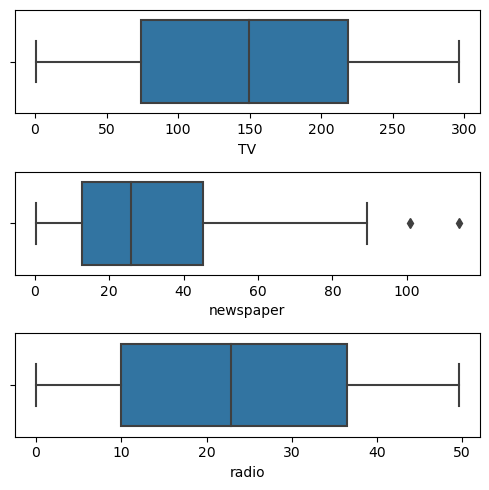

In [46]:
# Outlier Analysis
fig, axs = plt.subplots(3, 1, figsize=(5, 5))
plt1 = sns.boxplot(x=df['TV'], ax=axs[0])
plt2 = sns.boxplot(x=df['newspaper'], ax=axs[1])
plt3 = sns.boxplot(x=df['radio'], ax=axs[2])
plt.tight_layout()
plt.show()


In [47]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


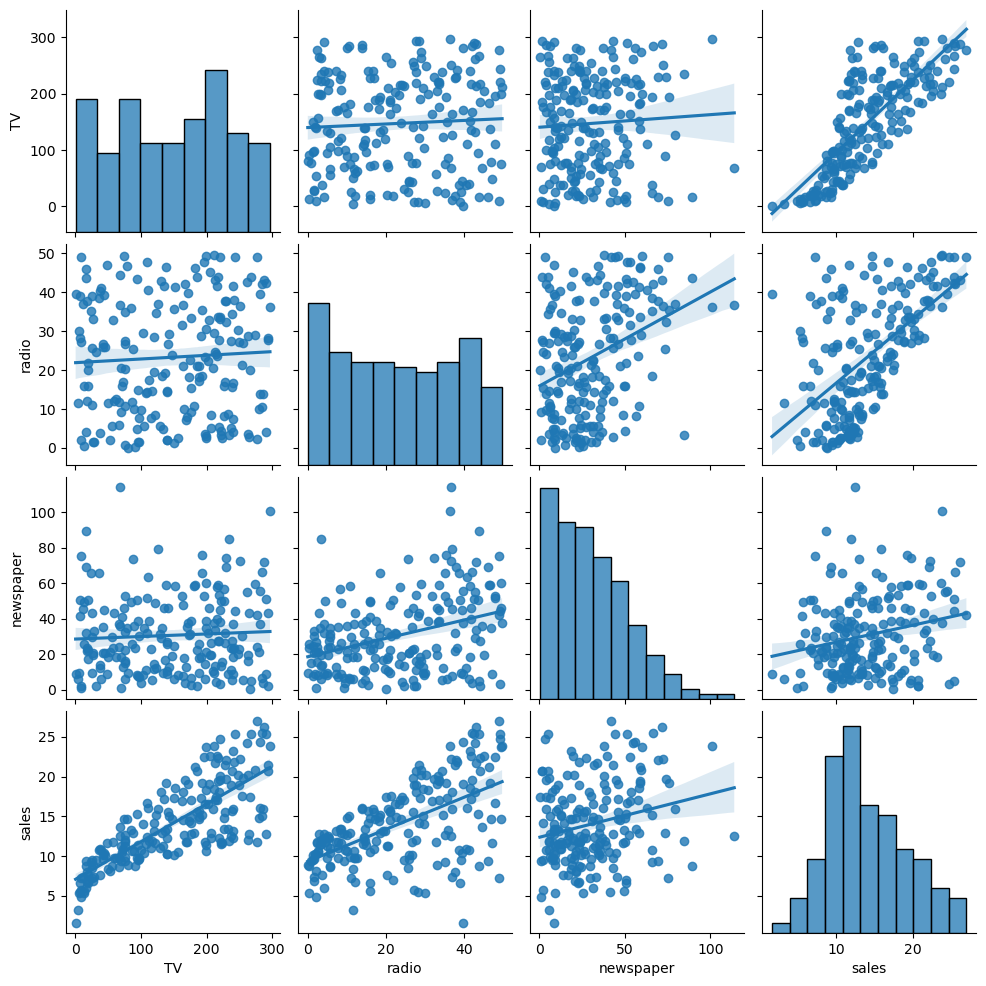

In [48]:
sns.pairplot(df, kind  ="reg");

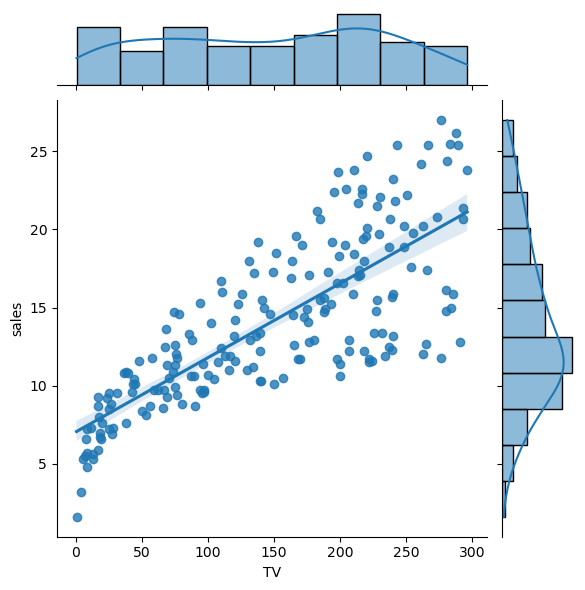

In [49]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

## Model building with Statsmodels

In [50]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        13:19:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Some descriptive statistics from the summary the values we are interested in are the following;


1. The coefficient for TV is 0.055 and the p value is very low. The coefficient is statistically significant. In other words, the relationship is not completely random.

2. R-squared is 0.812.
This means that 81.2 per cent of the variance in Sales is explained by TV. This is a good R-squared value.

3. The F statistic has a very low p-value (practically low)
This means that the model fit is statistically significant and the variance explained is not entirely random.


In [51]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [52]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


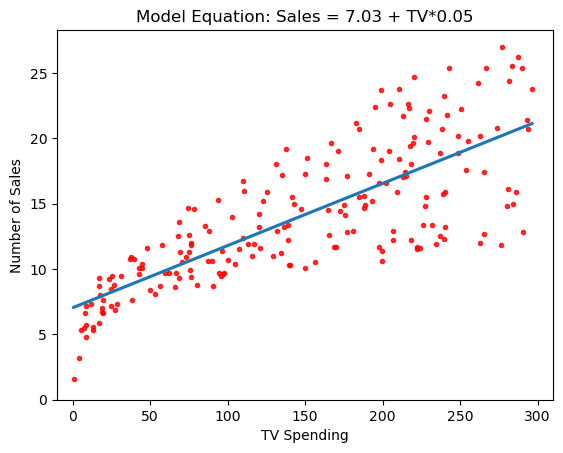

In [53]:
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Equation: Sales = 7.03 + TV*0.05")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV Spending")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


## Model building with scikit-learn

In [54]:
X = df[['TV']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
# Create a DataFrame to compare actual and predicted values
k_t = pd.DataFrame({"Actual y": y[0:10],
                    "Predicted y": model.predict(X)[0:10]})

# Calculate the error between actual and predicted values
k_t["Error"] = k_t["Actual y"] - k_t["Predicted y"]

# Calculate the squared error
k_t["Squared Error"] = k_t["Error"] ** 2

# Display the DataFrame
print(k_t.to_string(index=False))


 Actual y  Predicted y     Error  Squared Error
     22.1    17.917895  4.182105      17.490001
     10.4     9.304607  1.095393       1.199886
      9.3     8.037674  1.262326       1.593467
     18.5    14.270242  4.229758      17.890854
     12.9    15.629990 -2.729990       7.452848
      7.2     7.643208 -0.443208       0.196433
     11.8     9.907908  1.892092       3.580010
     13.2    12.817678  0.382322       0.146170
      4.8     7.638567 -2.838567       8.057462
     10.6    16.511739 -5.911739      34.948654


In [56]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)  # Squared=False, RMSE hesaplamak için karesini almaz
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 8.970991242413616
Root Mean Squared Error: 2.995161304907236
Mean Absolute Error: 2.2758809050205118


## Forecast
Model equation:

Sales = 6.97 + TV*0.06

For example, what is the estimated value of sales when there is a TV spend of 30 units?

In [57]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [58]:
model.predict([[30]])

array([8.45869276])